# Electricity & Weather Data Analysis

# Introduction
The [Energy_Use_Info](https://github.com/MichaelSalata/Energy_Use_Info) is meant to gather insights on electricity usage.

This notebook looks for insights into electricity usage relative to weather data.

## Data
* This notebook uses data cleaned with "green_button_data_cleaning.ipynb" aka:  clean_energy_use_*.csv
* This notebook uses data cleaned with "weather_data_cleaning.ipynb.ipynb" aka: clean_weather_*.csv


## My Energy Data Source
Currently, the data is from my energy company(ComEd) from the past year. 10_22_2022 to 10_22_2023
Data from the [My Green Button](https://secure.comed.com/MyAccount/MyBillUsage/pages/secure/GreenButtonConnectDownloadMyData.aspx) webpage on the ComEd website.

## My Weather Data Source
My weather data was collected using [Meteostat](https://github.com/meteostat/meteostat-python). The Meteostat Python library provides a simple API for accessing open weather and climate data. The historical observations and statistics are collected by Meteostat from different public interfaces, most of which are governmental.

Among the data sources are national weather services like the National Oceanic and Atmospheric Administration (NOAA) and Germany's national meteorological service (DWD).

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
import glob
directory_path = "./data"
file_pattern = "energy_weather_*.csv"

file_path = glob.glob(f"{directory_path}/{file_pattern}")[0]
energy_weather_df = pd.read_csv(filepath_or_buffer=file_path)
energy_weather_df.info()
energy_weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8759 non-null   int64  
 1   time        8759 non-null   object 
 2   temp        8759 non-null   float64
 3   dwpt        8759 non-null   float64
 4   rhum        8759 non-null   float64
 5   prcp        8759 non-null   float64
 6   wdir        8759 non-null   float64
 7   wspd        8759 non-null   float64
 8   pres        8759 non-null   float64
 9   HOUR        8759 non-null   object 
 10  COST        8759 non-null   float64
 11  USAGE       8759 non-null   float64
 12  feel        8759 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 889.7+ KB


,Unnamed: 0,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,HOUR,COST,USAGE,feel
0,0,2022-10-22 00:00:00,21.4,5.8,36.0,0.0,190.0,14.8,1007.0,2022-10-22 00:00:00,0.03,0.24,21.4
1,1,2022-10-22 01:00:00,19.6,6.1,41.0,0.0,180.0,16.6,1007.0,2022-10-22 01:00:00,0.03,0.29,19.6
2,2,2022-10-22 02:00:00,17.5,5.5,45.0,0.0,180.0,9.4,1008.0,2022-10-22 02:00:00,0.02,0.20,17.5
3,3,2022-10-22 03:00:00,14.0,5.2,55.0,0.0,160.0,11.2,1008.0,2022-10-22 03:00:00,0.02,0.09,14.0
4,4,2022-10-22 04:00:00,14.2,5.4,55.0,0.0,170.0,11.2,1009.0,2022-10-22 04:00:00,0.02,0.09,14.2


In [68]:
# convert the time cols into Datetime objs
energy_weather_df['time'] = pd.to_datetime(energy_weather_df['time'], format='%Y-%m-%d %H:%M:%S')
# print(energy_weather_df['time'].dtypes)
# energy_weather_df.head(4)


# convert the START_TIME col into Datetime objs
energy_weather_df['HOUR'] = pd.to_datetime(energy_weather_df['HOUR'], format='%Y-%m-%d %H:%M:%S')
# print(energy_weather_df['HOUR'].dtypes)
# energy_weather_df.head(4)

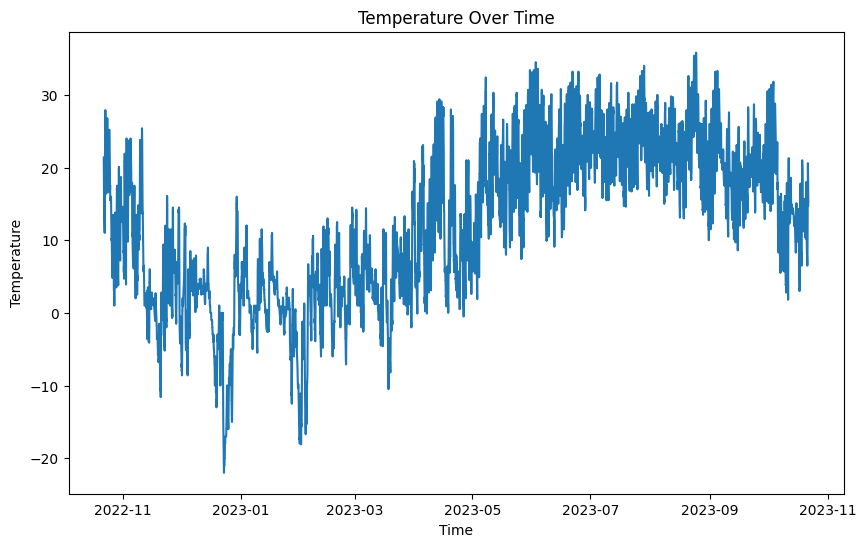

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(energy_weather_df['time'], energy_weather_df['temp'])
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

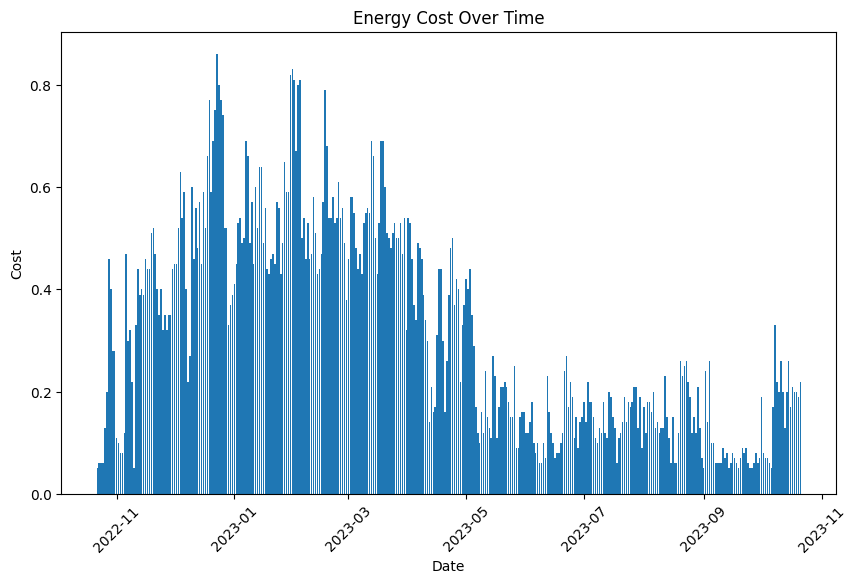

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(energy_weather_df['time'].dt.date, energy_weather_df['COST'])
plt.title('Energy Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.show()


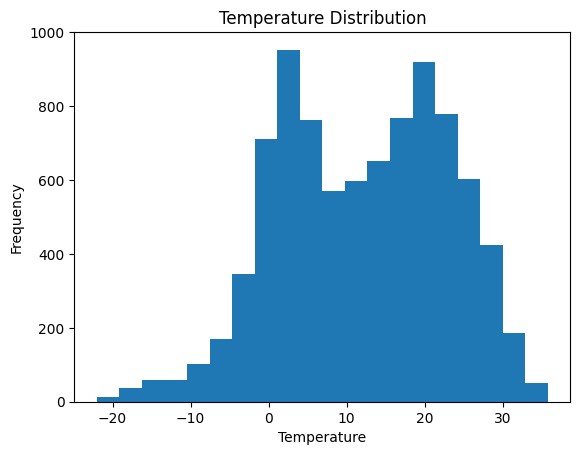

In [71]:
plt.hist(energy_weather_df['temp'], bins=20)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


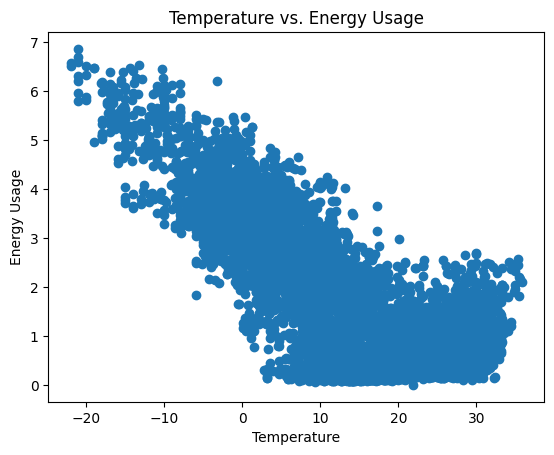

In [72]:
plt.scatter(energy_weather_df['temp'], energy_weather_df['USAGE'])
plt.title('Temperature vs. Energy Usage')
plt.xlabel('Temperature')
plt.ylabel('Energy Usage')
plt.show()



**prompt:** Temperature vs. Energy Usage, can you plot a line through the scatter plot that follows the average energy usage for each temperature?

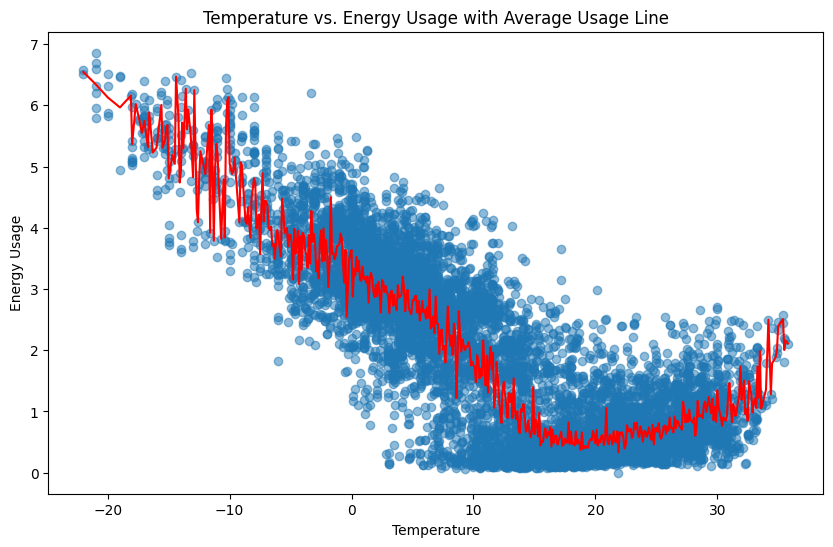

In [73]:
import numpy as np

# Scatter plot of Temperature vs. Energy Usage
plt.figure(figsize=(10, 6))
plt.scatter(energy_weather_df['temp'], energy_weather_df['USAGE'], alpha=0.5)

# Calculating the average energy usage for each temperature and plotting a line
# Group by temperature and calculate mean USAGE
temp_usage_avg = energy_weather_df.groupby('temp')['USAGE'].mean().reset_index()

# Sorting the values for a smooth line
temp_usage_avg = temp_usage_avg.sort_values(by='temp')

# Plotting the line
plt.plot(temp_usage_avg['temp'], temp_usage_avg['USAGE'], color='red')

# Adding titles and labels
plt.title('Temperature vs. Energy Usage with Average Usage Line')
plt.xlabel('Temperature')
plt.ylabel('Energy Usage')
plt.show()


In [74]:

# First, create the scatter plot
fig = px.scatter(energy_weather_df, x='temp', y='USAGE', title='Temperature vs. Energy Usage',
                 labels={'temp': 'Temperature', 'USAGE': 'Energy Usage'}, opacity=0.5)

fig.update_traces(marker=dict(symbol='x'))

# add the average energy usage line on top
fig.add_trace(go.Scatter(x=temp_usage_avg['temp'], y=temp_usage_avg['USAGE'], mode='lines', name='Average Usage', line=dict(color='red')))

fig.show()


In [75]:
# graph the USAGE level for different temperature levels
# Convert 'temp' to Fahrenheit
energy_weather_df['temp_fahrenheit'] = (energy_weather_df['temp'] * 9/5) + 32

# Create temperature bins
temp_bins = list(range(-10, 110, 10))

# Categorize rows based on temperature bins
energy_weather_df['temp_bins'] = pd.cut(energy_weather_df['temp_fahrenheit'], bins=temp_bins, right=False)

# Group by temperature bins and calculate average 'USAGE' and count
average_data = energy_weather_df.groupby('temp_bins').agg({'USAGE': ['mean', 'count']}).reset_index()
average_data.columns = ['temp_bins', 'avg_USAGE', 'count']

In [76]:

# Create the bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=average_data['temp_bins'].astype(str),
        y=average_data['avg_USAGE'],
        text=average_data['count'].apply(lambda x: f'{x}<br>hrs'),
        textposition='auto',
        marker_color='royalblue',
        name='Average USAGE'
    )
])

# Set titles and labels
fig.update_layout(
    title='Average USAGE every 10°F',
    xaxis_title='Temperature Ranges (10°F)',
    yaxis_title='Avg USAGE per Hour (kWh)',
    xaxis_tickangle=-45
)

# Customize the layout
fig.update_layout(
    title_text='Average USAGE every 10°F (Temperature)',
    barmode='group',
    xaxis_tickangle=-45,
    legend=dict(x=0.1, y=1.1, orientation="h")
)

# Add gridlines
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

# Show the figure
fig.show()


In [77]:
energy_weather_df.columns

Index(['Unnamed: 0', 'time', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd',
       'pres', 'HOUR', 'COST', 'USAGE', 'feel', 'temp_fahrenheit',
       'temp_bins'],
      dtype='object')

In [78]:
# Calculate 7-day rolling average for 'COST'
hours = 24
days = 7
window_size = hours * days
rolling_avg_cost = energy_weather_df['COST'].rolling(window=window_size).mean()

# Calculate 7-day rolling average for 'temp'
rolling_avg_temp = energy_weather_df['temp'].rolling(window=window_size).mean()

In [79]:
from plotly.subplots import make_subplots

# Create subplots with secondary_y axis for the two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add rolling average of 'COST' to the primary y-axis
fig.add_trace(
    go.Scatter(x=energy_weather_df['time'], y=rolling_avg_cost, name='7-day Rolling Avg Cost', mode='lines', line=dict(color='green')),
    secondary_y=False,
)

# Add rolling average of 'temp' to the secondary y-axis
fig.add_trace(
    go.Scatter(x=energy_weather_df['time'], y=rolling_avg_temp, name='Temp (7-Day Avg)', mode='lines', line=dict(color='royalblue')),
    secondary_y=True,
)

# Set axis titles
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='<b>7-day Rolling Avg Cost ($USD)</b>', secondary_y=False, tickprefix='$')
fig.update_yaxes(title_text='<b>Temperature (°C)</b>', secondary_y=True)

# Set figure title
fig.update_layout(
    title_text='7-day Rolling Average Cost & Temperature'
)

# Show figure
fig.show()
